# Lab 4: Linear Regression and Clustering

## Jinhao Hu: (jhu41)

## Due: September 26, 2018 11:59 PM [Next Wednesday]

### Logistics

See the website.

### What You Will Need to Know For This Lab

* K-means clustering
* Vector Quantization
* Nearest Neighbors Classification
* Linear Regression

### Preamble (don't change this)

In [1]:
!pip3 install Pillow

In [2]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages (18.0)


In [3]:
%pylab inline
import numpy as np
from sklearn import neighbors
from numpy import genfromtxt
import scipy.spatial.distance as dist
import random
from sklearn.cluster import KMeans
from PIL import Image
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


### Problem 1: Linear Regression (35 points)

In this problem, you will do model selection for linear regression using Ordinary Least Squares, Ridge Regression and the LASSO.

The dataset you will use has 8 features:

    lcavol - log cancer volume
    lcaweight - log prostate weight
    age
    lbph - log of amount of benign prostatic hyperplasia
    svi - seminal vesicle invasion
    lcp - log capsular penetration
    gleason - Gleason score
    pgg45 - percent of Gleason scores 4 or 5

and you will predict the level of a prostate-specific antigen. The data set was collected from a set of men about to receive a radical prostatectomy. More details are given in Section 3.2.1 in Elements of Statistical Learning 2e by Hastie et al.

In [4]:
# Load the data
trainp= genfromtxt('trainp.csv', delimiter=',')

# Training data: 
trainfeat=trainp[:,:-1] #Training features (rows are feature vectors)
trainresp=trainp[:,-1] #Training responses

valp= genfromtxt('valp.csv',delimiter=',')
# Validation data:
valfeat=valp[:,:-1] #Validation Features (rows are feature vectors)
valresp=valp[:,-1] #Validation Response

# Standardize and center the features
ftsclr=StandardScaler()
trainfeat = ftsclr.fit_transform(trainfeat)
valfeat= ftsclr.transform(valfeat)
# and the responses (note that the example in the notes has centered but not 
#                    standardized responses, so your numbers won't match up)
rsclr=StandardScaler()
trainresp = (rsclr.fit_transform(trainresp.reshape(-1,1))).reshape(-1)
valresp= (rsclr.transform(valresp.reshape(-1,1))).reshape(-1)

# The training features are in trainfeat
# The training responses are in trainresp
# The validation features are in valfeat
# The validation responses are in valresp

Since we centered the responses, we can begin with a benchmark model: Always predict the response as zero (mean response on the training data). Calculate the validation RSS for this model. **(5 points)**

If another model does worse than this, it is a sign that something is amiss.

Note: The RSS on a data set with $V$ samples is given by $\frac{1}{V} \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2$ where $\mathbf{y}$ is a vector of the responses, and $\hat{\mathbf{y}}$ is the predicted responses on the data.

In [5]:
features = np.array(["lcavol","lcaweight","age","lbph","svi","lcp","gleason","pgg45"])
print(features)

['lcavol' 'lcaweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45']


In [6]:
# Put your code here
LR = linear_model.LinearRegression()
LR.fit(trainfeat, trainresp)
Pred_R = LR.predict(valfeat)
V=len(Pred_R)
y=np.zeros(len(Pred_R))

RSS= (1/V)*(np.linalg.norm(y - Pred_R)**2)

print ("validation RSS for this benchmark model: ", RSS)

validation RSS for this benchmark model:  0.36371621543358174


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[Insert Answer Here]
validation RSS for this model:  0.36371621543358174

First, you will try (Ordinary) Least Squares. Use `sklearn.linear_model.LinearRegression` with the default options. Calculate the validation RSS. <b>(5 points)</b>

Note: The .score() method returns an [$R^2$  value](https://en.wikipedia.org/wiki/Coefficient_of_determination), not the RSS, so you shouldn't use it anywhere in this problem. 

In [7]:
# Put your code here
y=valresp
RSS= (1/V)*(np.linalg.norm(y - Pred_R)**2)

print ("validation RSS for Ordinary model: ", RSS)

validation RSS for Ordinary model:  0.36230709903819763


[Insert Answer Here] validation RSS for Ordinary model:  0.36230709903819763

Now, you will apply ridge regression with `sklearn.linear_model.Ridge`. 

Sweep the regularization/tuning parameter $\alpha=0,\ldots,100$ with 1000 equally spaced values. 

Make a plot of the RSS on the validation set versus $\alpha$. What is the minimizing $\alpha$, corresponding coefficients and validation error? 

Larger values of $\alpha$ shrink the weights in the model more. $\alpha=0$ corresponds to the LS solution. <b>(10 points)</b>

minimizing α:  12.312312312312313 
corresponding coefficients:  123 
validation error 0.3384853327816166


Text(0,0.5,'RSS')

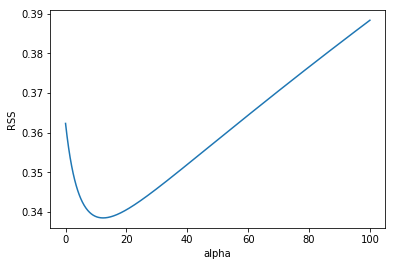

In [8]:
# Put your code here

RSS= np.zeros(1000)
a= np.linspace(0,100,num=1000)
counter=0
for i in a:
    LSR= linear_model.Ridge(alpha=i)
    LSR.fit(trainfeat, trainresp)
    Pred_R= LSR.predict(valfeat)
    y=valresp
    RSS[counter]=(1/V)*(np.linalg.norm(y - Pred_R)**2)
    counter+=1

print("minimizing α: ", a[np.argmin(RSS)], "\ncorresponding coefficients: ", np.argmin(RSS), "\nvalidation error", RSS[int(np.argmin(RSS))])


plot(a, RSS)
plt.xlabel("alpha")
plt.ylabel("RSS")

[Insert Answer Here]
minimizing α:  12.312312312312313 
corresponding coefficients:  123 
validation error 0.3384853327816166

In [9]:
alpha=a[np.argmin(RSS)]
LSR= linear_model.Ridge(alpha=alpha)
LSR.fit(trainfeat, trainresp)
#print(LSR.coef_!=0)
print(features[LSR.coef_!=0])

['lcavol' 'lcaweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45']


Now, you will apply the LASSO with `sklearn.linear_model.Lasso`. 

Sweep the tuning/regularization parameter $\alpha=0,\ldots,1$ with 1000 equally spaced values. 

Make a plot of the RSS on the validation set versus $\alpha$. What is the minimizing $\alpha$, corresponding coefficients and validation error? 


Larger values of $\alpha$ lead to sparser solutions (i.e. less features used in the model), with a sufficiently large value of $\alpha$ leading to a constant prediction. Small values of $\alpha$ are closer to the LS solution, with $\alpha=0$ being the LS solution. <b>(10 points)</b>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


minimizing α:  0.09309309309309309 
corresponding coefficients:  93 
validation error 0.3142651111631038


Text(0,0.5,'RSS')

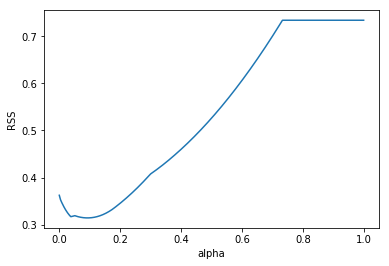

In [10]:
# Put your code here
RSS= np.zeros(1000)
a= np.linspace(0,1,num=1000)
counter=0
for i in a:
    LSR= linear_model.Lasso(alpha=i)
    LSR.fit(trainfeat, trainresp)
    Pred_R= LSR.predict(valfeat)
    y=valresp
    RSS[counter]=(1/V)*(np.linalg.norm(y - Pred_R)**2)
    counter+=1

print("minimizing α: ", a[np.argmin(RSS)], "\ncorresponding coefficients: ", np.argmin(RSS), "\nvalidation error", RSS[int(np.argmin(RSS))])


plot(a, RSS)
plt.xlabel("alpha")
plt.ylabel("RSS")

In [11]:
alpha=a[np.argmin(RSS)]
LSR= linear_model.Lasso(alpha=alpha)
LSR.fit(trainfeat, trainresp)
#print(LSR.coef_!=0)
print(features[LSR.coef_!=0])

['lcavol' 'lcaweight' 'lbph' 'svi' 'pgg45']


[Insert Answer Here]

Which features were selected by Ridge Regression when minimizing the RSS on the validation set? Which features were selected by LASSO when minimizing the RSS on the validation set? Which model would you choose (and why)? <b>(5 points)</b>

[Insert Answer Here] The features selected by Ridge Regression are 'lcavol' 'lcaweight' 'age' 'lbph' 'svi' 'lcp' 'gleason' 'pgg45', and features selected by LASSO are 'lcavol' 'lcaweight' 'lbph' 'svi' 'pgg45'
I would choose LASSO, since it has the smallest validation error among all these models.


### Problem 2: Selecting the number of clusters (30 points)

Write a function which implements K-means clustering. 

You will be given as input:
* A $(N,d)$ numpy.ndarray of unlabeled data (with each row as a feature vector), data
* A scalar $K$ which indicates the number of clusters
* A scalar representing the number of iterations, niter (this is your stopping criterion/criterion for convergence)

Your output will be a tuple consisting of a vector of length N containing which cluster ($0,\ldots,K-1$) a feature vector is in and a $(K,d)$ matrix with the rows containing the cluster centers. 

Do not use scikit-learn or similar for implement K-means clustering. You may use `scipy.spatial.distance.cdist` to calculate distances. Initialize the centers randomly without replacement with points from the data set. `random.sample` may be useful for this. <b>(10 points)</b>

In [12]:
def kMeans(data,K,niter):
    #Put your code here
    N=len(data)
    centers = np.array(random.sample(np.ndarray.tolist(data),K))
    #rcc = np.random.RandomState(2)
    #i = rcc.permutation(data.shape[0])[:K]
    #random_centers = data[i]
    labels = np.zeros(N)
    
    for rd in range(niter):
        distance=dist.cdist(data,centers)
        
        for i in range(N):
            labels[i]=np.argmin(distance[i,:])
            
        for j in range(K):          
            centers[j,:] = data[labels==j,:].mean(axis=0)
    mytuple=(labels,centers)
    return mytuple

The K-means clustering problem tries to minimize the following quantity by selecting $\{z_i\}_{i=1}^N$ and $\{\mu_k\}_{k=1}^K$:
$$J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)=\sum_{i=1}^N \lVert \mathbf{x}_i - \mathbf{\mu}_{z_i} \rVert^2$$
where $\mathbf{\mu}_{z_i}$ is the center of the cluster to which $\mathbf{x}_i$ is assigned.

One visual heuristic to choose the number of clusters from the data (where the number of clusters is not known a priori) is to estimate the optimal value of $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$, $J^*(K)$ , for different values of $K$ and look for an "elbow" or "knee" in the curve of $J^*$ versus $K$ and choose that value of $K$. 

In this part of the problem, you will run $K$-means 100 times for each $K=2,\ldots,10$ and calculate $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$ for the clustering given by $K$-means. Use the smallest value of $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$ in the runs of $K$-means for each value of $K$ to form an estimate of $J^*(K)$. Plot this estimate versus $K$. Which $K$ should you pick by this heuristic? Use niter=100 for each run of $K$-means.

For an attempt to formalize this heuristic, see Tibshirani, Robert, Guenther Walther, and Trevor Hastie. "Estimating the number of clusters in a data set via the gap statistic." Journal of the Royal Statistical Society: Series B (Statistical Methodology) 63.2 (2001): 411-423. Sometimes, an elbow does not exist in the curve or there are multiple elbows or the $K$ value of an elbow cannot be unambiguously identified. Further material can be found on <a href="http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method">Wikipedia</a> as well.  

Note: Your code should be relatively quick -- a few minutes, at worst. <b>(10 points)</b>

In [13]:
# Load up some data, which we will store in a variable called problem1
problem1= genfromtxt('problem1.csv', delimiter=',')

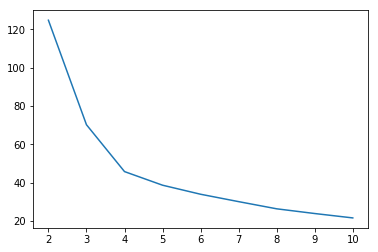

In [14]:
# Put your code here
jk=[]
for k in range(2, 11):
    runs=[]
    for i in range(100):
        value=0
        labels,centers = kMeans(problem1,k,100)
        for j in range(len(centers)):
            if j in labels:
                value=value+ np.linalg.norm(problem1[labels==j]-centers[j])**2
        runs.append(value)
    jk.append(np.min(runs))
    
plt.plot(np.arange(2,11), jk)


[Insert Answer Here] I would pick K=4, because here is the elbow for the curve.

Using the value of $K$ you determined from the elbow, perform K-means clustering on the data. 
Plot it as a scatter plot with the colors given by the labels. <b>(5 points)</b>

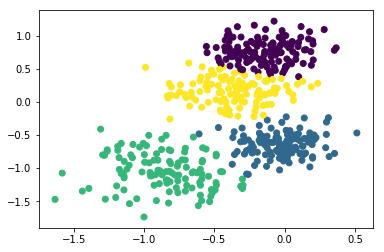

In [15]:
#Put your code here
labels, centers = kMeans(problem1,4,100)
scatter(problem1[:,0],problem1[:,1], c=labels)

Should you pick the $K$ such that $J^*(K)$ is minimized? Why or why not? <b>(5 points)</b>

[Insert Answer Here] No. When we try to minimize J∗(K), we have to increase K, and we may have split each data point into a cluster itself. We only need to find the elbow in the curve, which is already good enough for a kind of data.

### Problem 3: Vector Quantization (40 points)

In this problem, you will implement vector quantization. You will use `sklearn.cluster.KMeans` for the K-means implementation and use k-means++ as the initialization method. See Section 4.2.1 in the notes for details. 

Write a function to generate a codebook for vector quantization. You will be given inputs:
* A $(N,M)$ numpy.ndarray representing a greyscale image, called image. (If we want to generate our codebook from multiple images, we can concatenate the images before running them through this function).
* A scalar $B$, for which you will use $B \times B$ blocks for vector quantization. You may assume $N$ and $M$ are divisible by $B$.
* A scalar $K$, which is the size of your codebook

You will return:
* The codebook as a $(K,B^2)$ numpy.ndarray. 
<b>(10 points)</b>

In [16]:
def trainVQ(image,B,K):
    #Put your code here
    N=len(image)
    M=len(image[0])
    row = np.split(image, N/B) #split in rows
    full =[]
    for i in row:# 2D array
        rowarray = (np.asarray(np.split(i, M/B, axis=1))) #split in columns
        for j in rowarray:
            full.append(j)
    newshape = []
    for i in range(int(M*N/(B**2))):
        newshape.append(full[i].reshape(B**2))
    
    codebook=KMeans(n_clusters=K,init="k-means++").fit(newshape).cluster_centers_
    return codebook
    


Write a function which compresses an image against a given codebook. You will be given inputs:
* A $(N,M)$ numpy.ndarray representing a greyscale image, called image. You may assume $N$ and $M$ are divisible by $B$.
* A $(K,B^2)$ codebook called codebook
* $B$

You will return:
* A $(N/B,M/B)$ numpy.ndarray consisting of the indices in the codebook used to approximate the image. 

You can use the nearest neighbor classifier from scikit-learn if you want (though it is not necessary) to map blocks to their nearest codeword. <b>(10 points)</b>

In [17]:
def compressImg(image, codebook,B):
    #Put your code here
    N=len(image)
    M=len(image[0])
    
    #    indices =np.zeros((1,int(M*N/(B**2))))
    indices =np.zeros((int(N/B),int(M/B)))
    
    row = np.split(image, N/B) #split in rows
    full =[]
    for i in row:# 2D array
        rowarray = (np.asarray(np.split(i, M/B, axis=1))) #split in columns
        for j in rowarray:
            full.append(j)
        
    for i in range(int(N/B)):
        for j in range(int(M/B)):
            choice = []
            for point in codebook:
                newindices=(np.linalg.norm(full[int(i*M/B+j)].reshape(B**2)-point))
                choice.append(newindices)
            indices[i][j]=(np.argmin(choice)) 
    #reshape(indices,(int(N/B),int(M/B)))        
    return indices

Write a function to reconstruct an image from its codebook. You will be given inputs:
* A $(N/B,M/B)$ numpy.ndarray containing the indices of the codebook for each block called indices
* A codebook as a $(K,B^2)$ numpy.ndarray called codebook
* $B$

You will return a $(N,M)$ numpy.ndarray representing the image. <b>(10 points)</b>

In [18]:
def decompressImg(indices, codebook,B):
    #Put your code here
    N=len(indices)
    M=len(indices[0])
    
    backimage = np.zeros((N*B, M*B))
            
    for i in range(N):
        for j in range(M):
            piece = codebook[int(indices[i][j])].reshape(B,B)
            for a in range(B):
                for b in range(B):
                    backimage[B*i+a,B*j+b]=piece[a,b]
    return backimage

Run your vector quantizer with $5 \times 5$ blocks on the provided image with codebook sizes $K=2,5,10,20,50,100,200$ (i.e. generate codebooks from this image of those sizes, compress the image using those codebooks and reconstruct the images). Display and comment on the reconstructed images (you may be quantitative (e.g. PSNR) or qualitative). Which code book would you pick? Why? Make sure to take into account the bits per pixel used by the compressor.

Note the number of bits per pixel can be approximated as $\frac{\log_2 K}{25}$ and the codebook takes approximately $200K$ bits (assuming each pixel is stored as 8 bits). Some good ideas on quantitative arguments for codebook size can be found in Gonzalez & Woods, Digital Image Processing 3e or Gersho & Gray, Signal Compression & Vector Quantization. It is not necessary to look at these references for quantitative arguments, though. <b>(10 points)</b>

The image used is under fair use from [FIFA](https://www.fifa.com/worldcup/news/france-revel-winning-second-world-title-2986453).

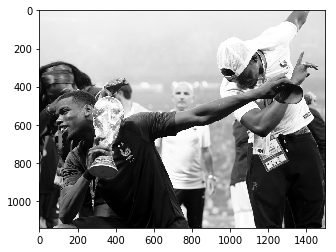

In [19]:
# The provided image is stored in image
image = np.asarray(Image.open("mrtb.jpg").convert("L"))
imshow(image, cmap = cm.Greys_r)

KeyboardInterrupt: 

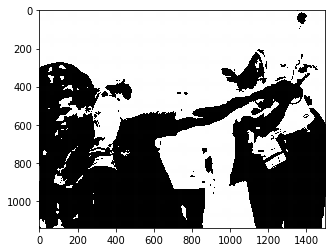

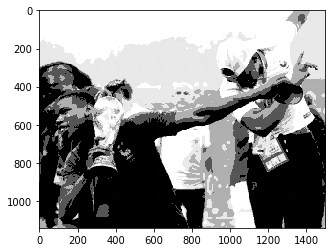

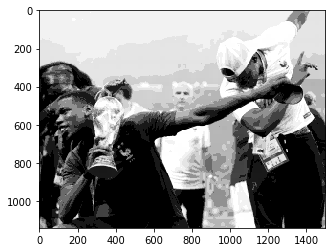

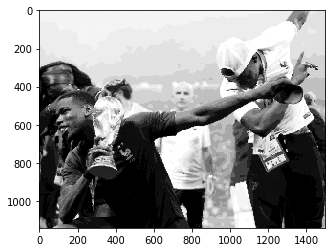

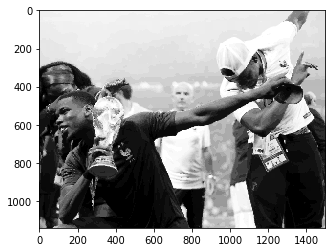

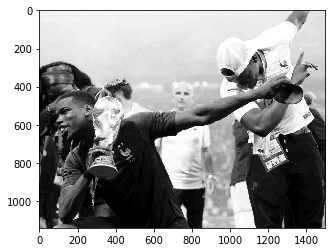

In [20]:
#Put your code here
K=[2,5,10,20,50,100,200]
for i in (K):
    codebook = trainVQ(image,5,i)
    #print(codebook)
    indices = compressImg(image,codebook,5)
    plt.figure()
    backpic=decompressImg(indices,codebook,5)
    imshow(backpic,cmap=cm.Greys_r)



[Insert Answer Here] If I have enough time, I would pick K=200. Though it takes much longer time, we can compare from all the images that it has the clearest picture and the most variations in colors. 

### Problem 4: Using K-means to Accelerate Nearest Neighbors (20 points)

In this problem, you will use K-means clustering to accelerate nearest neighbors, as outlined in the notes (Algorithm 7). Use `sklearn.neighbors.KNeighborsClassifier` for nearest neighbor classification and `sklearn.cluster.KMeans` for the K-means implementation with k-means++ as the initialization method.

You will write a function to generate prototypes from labeled data. It will have input:
* Training features as $(N,d)$ numpy.ndarray called traindata
* Training labels as a length $N$ vector called trainlabels
* $K$, the number of prototypes under each class

You will return a tuple containing:
* The prototypes selected as a $(K*\text{number of classes},d)$ numpy.ndarray
* The corresponding labels as a $K*\text{number of classes}$ length vector 

You may assume there are at least $K$ examples under each class. `set(trainlabels)` will give you the set of labels. <b>(10 points)</b>

In [21]:
def generatePrototypes(traindata,trainlabels,K):
    # Put your code here
    setlabels=len(set(trainlabels))
    ptypes=np.zeros((setlabels*K,len(traindata[0])))
    plabels=np.zeros(setlabels*K)
    
    for i in set(trainlabels):
        KM=KMeans(n_clusters=K, random_state=0)
        KM.fit(traindata[trainlabels==i,:])
        for j in range(K):
            ptypes[int(K*i)+j,:] = KM.cluster_centers_[j]
            plabels[int(K*i)+j] = i
    mytuple= (ptypes,plabels)
    
    return mytuple    

Train a nearest neighbor classifier (i.e. 1-NN)  with 1,10,50,100 and 200 prototypes per class for the digits data set from Lab 2. Comment on the validation error and computational complexity versus the nearest neighbor classifier from Lab 2 (error=0.056) and the LDA classifier (error=0.115) from Lab 2. Which classifier would you pick? Why? 

Note that this data set is generated from zip code digits from US mail, and the US Postal Service processes <a href="https://about.usps.com/who-we-are/postal-facts/one-day-by-the-numbers.htm">hundreds of millions of pieces of mail</a> a day, so a small improvement in error can lead to tremendous savings in terms of mis-routed packages (which cost a lot of money and time to re-transport). <b>(10 points)</b>

In [24]:
# Load the digits data set

#Read in the Training Data
traindata_tmp= genfromtxt('zip.train', delimiter=' ')
#The training labels are stored in "trainlabels", training features in "traindata"
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]


#Read in the Validation Data
valdata_tmp= genfromtxt('zip.val', delimiter=' ')
#The validation labels are stored in "vallabels", validation features in "valdata"
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]


In [26]:
# Put your code here
K=[1,10,50,100,200]
for i in K:
    prototypedata, prototypelabels = generatePrototypes(traindata,trainlabels,i)
    KNN=neighbors.KNeighborsClassifier(1)
    KNN.fit(prototypedata, prototypelabels)
    accuracy = KNN.score(valdata, vallabels)
    print ("When K is", i, ", we have error: ", 1-accuracy )

When K is 1 , we have error:  0.1858495266567015
When K is 10 , we have error:  0.08071748878923768
When K is 50 , we have error:  0.06875934230194325
When K is 100 , we have error:  0.05480817140009964
When K is 200 , we have error:  0.05530642750373693


[Insert Answer Here] I would choose the accelerated KNN. First, it is much faster for the time complexity. Then, comparing the the error with LDA, when we have K large enough, the error is much more smaller.

## And this concludes Lab 4! 